In [5]:
import numpy as np
from matplotlib import pyplot as plt

# Red Markets

Rules: 
- Roll a black die and a red die. Success if Black+Skill > Red
- Double odds is critical fail. Double evens is critical success.
- Spend additional resource for +1 to skill

(0.4, 1.0)

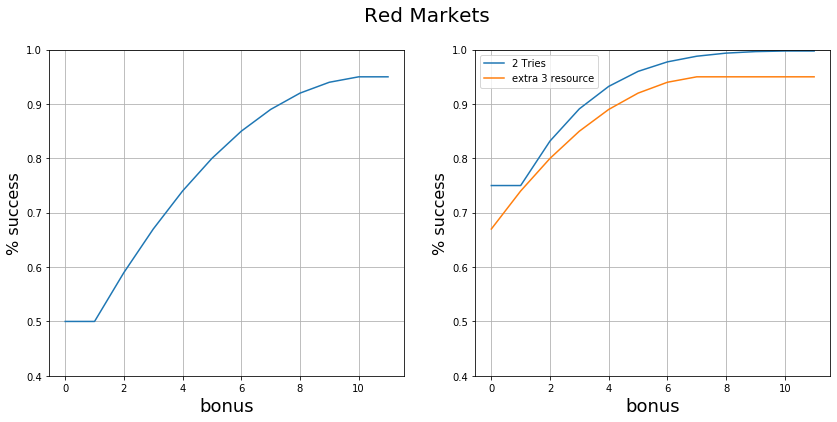

In [26]:
def red_markets(mod):
    cr_suc = 0
    cr_fail = 0
    suc = 0
    fail = 0

    for i in range(10):
        for j in range(10):
            if (i == j):
                if  (i%2 == 0):
                    cr_suc +=1
                else: 
                    cr_fail +=1
            elif (i+mod) > j:
                suc +=1
            else:
                fail +=1
    return((cr_suc + suc)/100)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Red Markets', fontsize=20)
fig.patch.set_facecolor('white')

axs[0].plot([red_markets(x) for x in range(12)])
axs[0].grid()
axs[0].set_xlabel('bonus', fontsize=18)
axs[0].set_ylabel('% success', fontsize=16)
axs[0].set_ylim(0.4,1.0)

axs[1].plot([(1 - (1 - red_markets(x))*(1 - red_markets(x))) for x in range(12)], label = "2 Tries")
axs[1].plot([red_markets(x) for x in range(3,15)], label = "extra 3 resource")
axs[1].grid()
axs[1].legend()
axs[1].set_xlabel('bonus', fontsize=18)
axs[1].set_ylabel('% success', fontsize=16)
axs[1].set_ylim(0.4,1.0)





# D20

Rules: 
- Roll a d20. If d20 + skill > target, success
- 20 always succeeds, 1 always fails. 

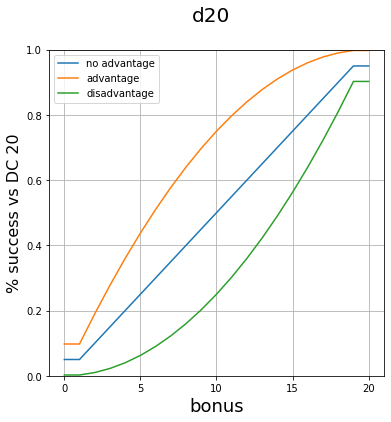

In [65]:
def d20(bonus, target, is_skill, adv = 'None'):
    eff_bonus = 20 + bonus - target
    probability = eff_bonus/20
    if (not is_skill):
        probability = np.max([np.min([probability, 0.95]), 0.05])
        
    if adv == "advantage":
        probability = 1 - (1-probability) * (1 - probability)
    elif adv == "disadvantage":
        probability = probability ** 2
    return(probability)


fig, axs = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle('d20', fontsize=20)
fig.patch.set_facecolor('white')



axs.plot([d20(x, 20, False) for x in range(21)], label = 'no advantage')
axs.plot([d20(x, 20, False, 'advantage') for x in range(21)], label = 'advantage')
axs.plot([d20(x, 20, False, 'disadvantage') for x in range(21)], label = 'disadvantage')
axs.grid()
axs.set_xlabel('bonus', fontsize=18)
axs.set_ylabel('% success vs DC 20', fontsize=16)
axs.set_ylim(0.0,1.0)
axs.legend()
axs.set_xticks(np.arange(0,21, 5))

# WoD / Shadowrun

Rules:
- Roll a number of dice based on skill + attribute
- Count dice meeting/exceeding target number
- Compare successes to difficulty
- Max die rolls 'explode', meaning they count as a success and you reroll. 

For WoD target number is 8. For exalted it's 7. Both use a d10.
For Shadowrun, use a d6, and the target number is 5

Text(0.5, 1.0, 'Exalted')

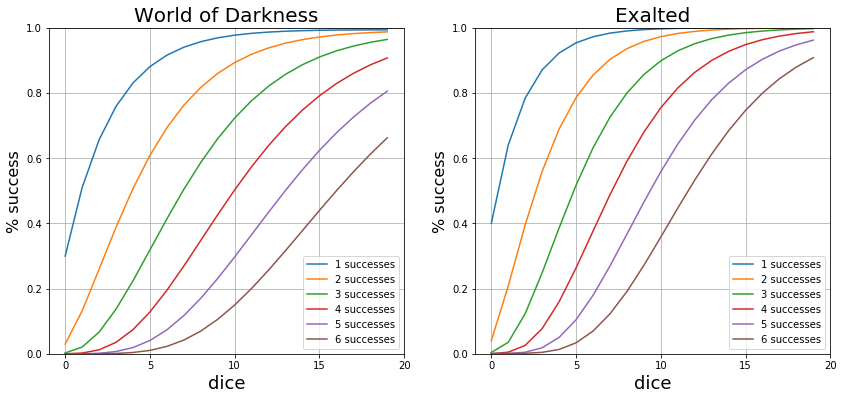

In [304]:
def WoD_pmf(n):
    if n == 0:
        return(0.7)
    else:
        return(0.27 * 0.1 ** (n-1))

def WoD_pmf_multiple(n, precision = 4):
    one_die = np.array([WoD_pmf(x) for x in range(precision)])
    cumulative = one_die
    for k in range(n-1):
        outer = np.outer(cumulative, one_die)
        probs = np.zeros(sum(outer.shape) - 1)
        for i in  range(outer.shape[0]):
            for j in range(outer.shape[1]):
                probs[i+j] += outer[i,j]
        cumulative = probs
    return(cumulative)

def WoD_cdf_multiple(n, threshold):
    pmf = WoD_pmf_multiple(n)
    return(1 - np.sum(pmf[:threshold]))
    
def exalted_pmf(n):
    if n == 0:
        return(0.6)
    else:
        return(0.36 * 0.1 ** (n-1))

def exalted_pmf_multiple(n, precision = 4):
    one_die = np.array([exalted_pmf(x) for x in range(precision)])
    cumulative = one_die
    for k in range(n-1):
        outer = np.outer(cumulative, one_die)
        probs = np.zeros(sum(outer.shape) - 1)
        for i in  range(outer.shape[0]):
            for j in range(outer.shape[1]):
                probs[i+j] += outer[i,j]
        cumulative = probs
    return(cumulative)

def exalted_cdf_multiple(n, threshold):
    pmf = exalted_pmf_multiple(n)
    return(1 - np.sum(pmf[:threshold]))
    
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.patch.set_facecolor('white')

axs[0].plot([WoD_cdf_multiple(x, 1) for x in range(1, 21)], label = '1 successes')
axs[0].plot([WoD_cdf_multiple(x, 2) for x in range(1, 21)], label = '2 successes')
axs[0].plot([WoD_cdf_multiple(x, 3) for x in range(1, 21)], label = '3 successes')
axs[0].plot([WoD_cdf_multiple(x, 4) for x in range(1, 21)], label = '4 successes')
axs[0].plot([WoD_cdf_multiple(x, 5) for x in range(1, 21)], label = '5 successes')
axs[0].plot([WoD_cdf_multiple(x, 6) for x in range(1, 21)], label = '6 successes')
axs[0].grid()
axs[0].set_xlabel('dice', fontsize=18)
axs[0].set_ylabel('% success', fontsize=16)
axs[0].set_ylim(0.0,1.0)
axs[0].legend()
axs[0].set_xticks(np.arange(0,21, 5))
axs[0].set_title('World of Darkness', fontsize=20)    
    
    
    

axs[1].plot([exalted_cdf_multiple(x, 1) for x in range(1, 21)], label = '1 successes')
axs[1].plot([exalted_cdf_multiple(x, 2) for x in range(1, 21)], label = '2 successes')
axs[1].plot([exalted_cdf_multiple(x, 3) for x in range(1, 21)], label = '3 successes')
axs[1].plot([exalted_cdf_multiple(x, 4) for x in range(1, 21)], label = '4 successes')
axs[1].plot([exalted_cdf_multiple(x, 5) for x in range(1, 21)], label = '5 successes')
axs[1].plot([exalted_cdf_multiple(x, 6) for x in range(1, 21)], label = '6 successes')
axs[1].grid()
axs[1].set_xlabel('dice', fontsize=18)
axs[1].set_ylabel('% success', fontsize=16)
axs[1].set_ylim(0.0,1.0)
axs[1].legend()
axs[1].set_xticks(np.arange(0,21, 5))
axs[1].set_title('Exalted', fontsize=20)
    
    
    
    

Text(0.5, 1.0, 'World of Darkness')

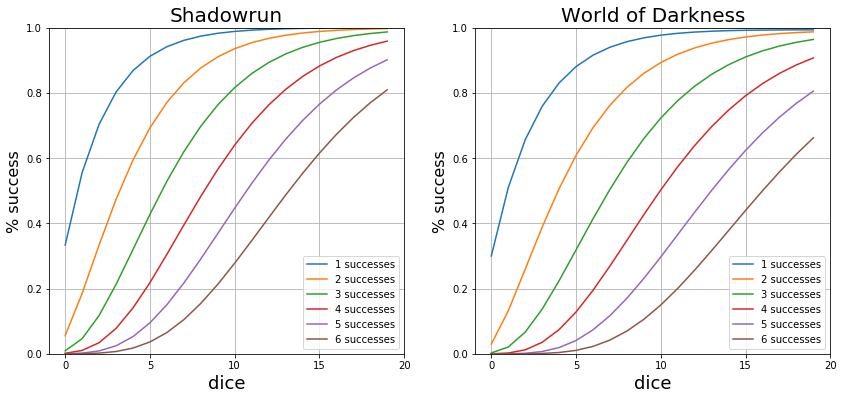

In [329]:
def Shadowrun_pmf(n):
    if n == 0:
        return(4/6)
    else:
        return((1/6 + 4/36) * 1/6 ** (n-1))

def Shadowrun_pmf_multiple(n, precision = 10):
    one_die = np.array([Shadowrun_pmf(x) for x in range(precision)])
    cumulative = one_die
    for k in range(n-1):
        outer = np.outer(cumulative, one_die)
        probs = np.zeros(sum(outer.shape) - 1)
        for i in  range(outer.shape[0]):
            for j in range(outer.shape[1]):
                probs[i+j] += outer[i,j]
        cumulative = probs
    return(cumulative)

def Shadowrun_cdf_multiple(n, threshold):
    pmf = Shadowrun_pmf_multiple(n)
    return(1 - np.sum(pmf[:threshold]))

    
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.patch.set_facecolor('white')

axs[0].plot([Shadowrun_cdf_multiple(x, 1) for x in range(1, 21)], label = '1 successes')
axs[0].plot([Shadowrun_cdf_multiple(x, 2) for x in range(1, 21)], label = '2 successes')
axs[0].plot([Shadowrun_cdf_multiple(x, 3) for x in range(1, 21)], label = '3 successes')
axs[0].plot([Shadowrun_cdf_multiple(x, 4) for x in range(1, 21)], label = '4 successes')
axs[0].plot([Shadowrun_cdf_multiple(x, 5) for x in range(1, 21)], label = '5 successes')
axs[0].plot([Shadowrun_cdf_multiple(x, 6) for x in range(1, 21)], label = '6 successes')
axs[0].grid()
axs[0].set_xlabel('dice', fontsize=18)
axs[0].set_ylabel('% success', fontsize=16)
axs[0].set_ylim(0.0,1.0)
axs[0].legend()
axs[0].set_xticks(np.arange(0,21, 5))
axs[0].set_title('Shadowrun', fontsize=20)    
    
axs[1].plot([WoD_cdf_multiple(x, 1) for x in range(1, 21)], label = '1 successes')
axs[1].plot([WoD_cdf_multiple(x, 2) for x in range(1, 21)], label = '2 successes')
axs[1].plot([WoD_cdf_multiple(x, 3) for x in range(1, 21)], label = '3 successes')
axs[1].plot([WoD_cdf_multiple(x, 4) for x in range(1, 21)], label = '4 successes')
axs[1].plot([WoD_cdf_multiple(x, 5) for x in range(1, 21)], label = '5 successes')
axs[1].plot([WoD_cdf_multiple(x, 6) for x in range(1, 21)], label = '6 successes')
axs[1].grid()
axs[1].set_xlabel('dice', fontsize=18)
axs[1].set_ylabel('% success', fontsize=16)
axs[1].set_ylim(0.0,1.0)
axs[1].legend()
axs[1].set_xticks(np.arange(0,21, 5))
axs[1].set_title('World of Darkness', fontsize=20)        
    
    
        
    
    
    

# Powered by the Apocalypse

Rules:
- Roll 2d6 and add a modifier.

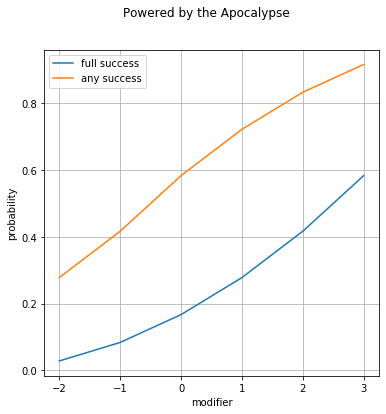

In [378]:
def PbtA(mod):
    character = 0
    compromise = 0
    gm = 0
    for i in range(6):
        for j in range(6):
            if i + j + 2 + mod >= 10:
                character += 1
            elif i + j + 2 + mod >= 7:
                compromise +=1
            else:
                gm +=1
    return character/36, (character + compromise)/36

plt.figure(figsize=(6, 6), facecolor = 'white')
plt.suptitle('Powered by the Apocalypse')
plt.plot(np.arange(-2, 4), [PbtA(x) for x in np.arange(-2,4)])
plt.legend( ['full success', 'any success'])
plt.xlabel('modifier')
plt.ylabel('probability')
plt.grid()


# Savage Worlds

Rules:
- Skills are die sizes. Roll your skill die + wild d6, explode on max
- Untrained is -2 at end.
- Success on 4. Raise on additional 4s

In [518]:
def Savage_Worlds_pmf(size):
    probs = []
    for j in np.arange(1, 7):
        for i in np.arange(1, size+1):
            if(i != size):
                probs.append(1/size**(j))
            else:
                probs.append(0)
    return(probs)
    
def Savage_Worlds_raise_pmf(size, modifier):
    numerical = Savage_Worlds_pmf(size)
    probs = []
    for i in np.arange(3 - modifier, len(numerical), 4):
        probs.append(1 - sum(numerical[:i]))
    return probs

def Savage_Worlds_raise_wild_pmf(size, modifier):
    probs = []
    for i in range(4):
        probs.append(1 - (1 - Savage_Worlds_raise_pmf(size, modifier)[i]) * (1 - Savage_Worlds_raise_pmf(6, modifier)[i]))
    return(probs)


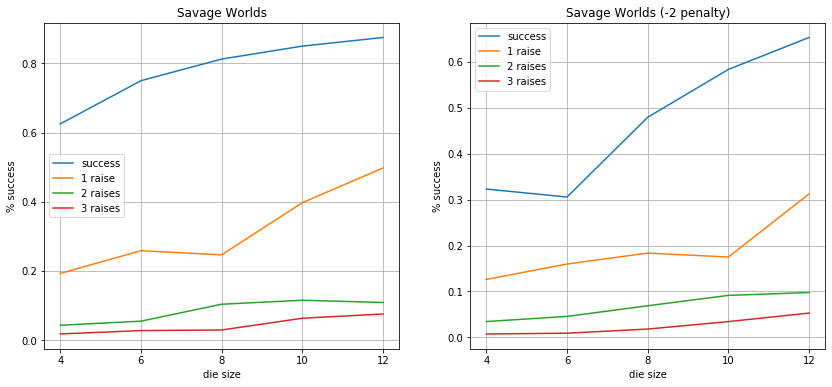

In [527]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.patch.set_facecolor('white')

axs[0].set_title('Savage Worlds')
axs[0].plot(np.arange(4,14, 2), [Savage_Worlds_raise_wild_pmf(x, 0) for x in np.arange(4,14, 2)])
axs[0].set_xlabel('die size')
axs[0].set_ylabel('% success')
axs[0].set_xticks(np.arange(4,14,2))
axs[0].legend(['success', '1 raise', '2 raises', '3 raises'])
axs[0].grid()

axs[1].set_title('Savage Worlds (-2 penalty)')
axs[1].plot(np.arange(4,14, 2), [Savage_Worlds_raise_wild_pmf(x, -2) for x in np.arange(4,14, 2)])
axs[1].set_xlabel('die size')
axs[1].set_ylabel('% success')
axs[1].set_xticks(np.arange(4,14,2))
axs[1].legend(['success', '1 raise', '2 raises', '3 raises'])
axs[1].grid()

